### 0 - Packages Import

In [1]:
# Packages related to general operating system & warnings
import os
import io
import warnings
warnings.filterwarnings('ignore')

# Packages related to data importing, manipulation, exploratory data analysis, data understanding
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
import requests


# Packages related to data visualizaiton
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

# Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

# Modules related to calculation of metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Modules related to ML Algorithms
import statsmodels.api    as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.tree         import plot_tree
from sklearn.ensemble     import RandomForestClassifier
from sklearn.neighbors    import KNeighborsClassifier

#sns.set()

### 1 - Importing data

In [2]:
# Downloading csv file from github public repository
url = "https://raw.githubusercontent.com/mittfagundes/TesteNeon/main/UCI_Credit_Card.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
nRowsRead = None
df = pd.read_csv(io.StringIO(download.decode('utf-8')), delimiter=',', nrows = nRowsRead)
df.dataframeName = 'UCI_Credit_Card.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


In [3]:
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# Renaming some column's names
df.rename(columns={'default.payment.next.month':'default'}, inplace = True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace = True)

### End

### 

### 2 - Data Analysis

In [5]:
# Checking for Null values
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

There aren't Null values in the DataFrame

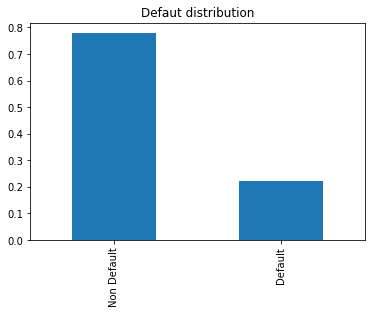

Prob of default is 22.12%


In [6]:
# Defaut rate from data
df['default'].replace({0:'Non Default', 1:'Default'}).value_counts(normalize=True).plot.bar()
plt.title('Defaut distribution')
plt.show()

def_rate = df.default.value_counts()[1] / (df.default.value_counts()[1] + df.default.value_counts()[0])
print(f'Prob of default is {def_rate*100}%')

It's an unbalanced dataset

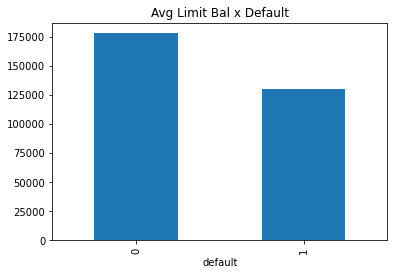

In [7]:
# Average Limit Bal x Default rate

df.groupby('default')['LIMIT_BAL'].mean().plot.bar()
plt.title('Avg Limit Bal x Default')
plt.show()

Non-defaulters have a higher limit, on average

SEX -- Gender (1=male, 2=female) \
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others) \
MARRIAGE: Marital status (1=married, 2=single, 3=others) \
AGE: Age in years

In [8]:
df[['SEX','EDUCATION','MARRIAGE', 'AGE']].describe()

,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


Sex is OK \
Education and Marriage have "unknown" categories [0, 5, 6] and [0] respectively \
75% of credit cards is taken by under 42 years old people

In [9]:
# Processing the "Unknown" labels

df['MARRIAGE']=df['MARRIAGE'].replace({0:4}) # Replacing 0 of marriage with 4 Unknown
df['EDUCATION']=df['EDUCATION'].replace({0:5,6:5}) # Replacing 0,6 with 5 Unknown

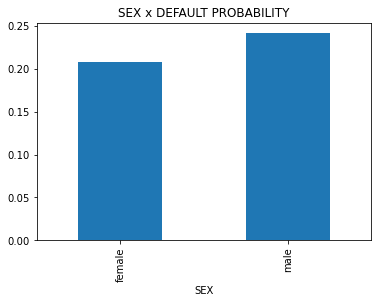

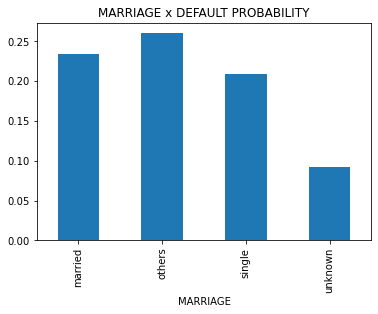

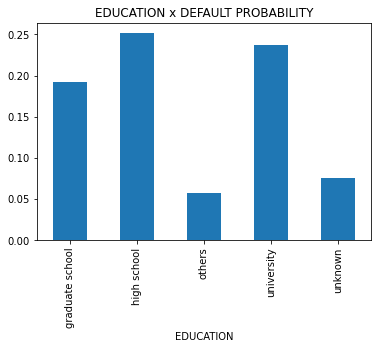

In [10]:
# Analysing categorical variables against default

df_cat = pd.DataFrame()

df_cat['default'] = df['default']
df_cat['MARRIAGE']= df['MARRIAGE'].replace({1:'married',2:'single',3:'others',4:'unknown'})
df_cat['EDUCATION']= df['EDUCATION'].replace({1:'graduate school',2:'university',3:'high school',4:'others', 5:'unknown'})
df_cat['SEX']=df['SEX'].replace({1:'male', 2:'female'})


def plot_categoric(cat_col):
    
    
    plt.title('{0} x DEFAULT PROBABILITY'.format(cat_col))
    df_cat.groupby(cat_col)['default'].mean().plot.bar()
    plt.show()
    
plot_categoric('SEX')
plot_categoric('MARRIAGE')
plot_categoric('EDUCATION')

Highlights:

Male is more likely to default than female \
Married is more likely to default than single \
High School and University are more likely to default than graduate school

<AxesSubplot:title={'center':'Defaulted Client'}, xlabel='AGE'>

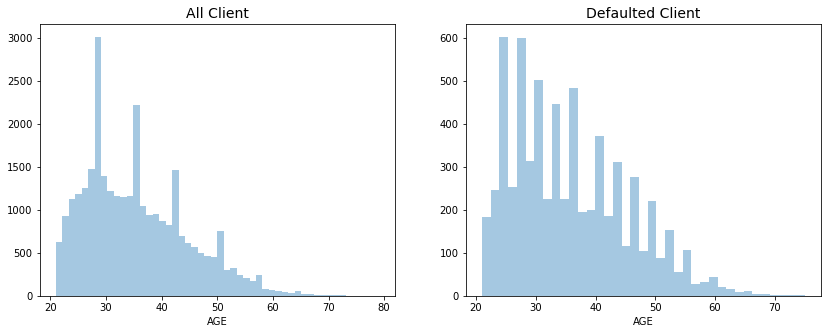

In [11]:
# Distribution by age

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.set_title('All Client', fontsize=14)
ax2.set_title('Defaulted Client', fontsize=14)
sns.distplot(df['AGE'], norm_hist=False, kde=False, ax=ax1)
sns.distplot(df['AGE'][df['default'] == 1], norm_hist=False, kde=False, ax=ax2)

We see left skewed distributions, great part of credit cards belongs to under 42 aged people

In [12]:
# Bad rate by age 

df_age_bad =  df.groupby(df['AGE'][df['default'] == 1]).size().reset_index(name='BAD')
df_age_tot =  df.groupby('AGE').size().reset_index(name='TOTAL')

df_age = df_age_tot.join(df_age_bad['BAD'])
df_age['BAD_RATE'] = round((df_age_bad['BAD']/df_age_tot['TOTAL'])*100, 2)
df_age

,AGE,TOTAL,BAD,BAD_RATE
0,21,67,14.0,20.90
1,22,560,169.0,30.18
2,23,931,247.0,26.53
3,24,1127,300.0,26.62
4,25,1186,302.0,25.46
5,26,1256,253.0,20.14
6,27,1477,313.0,21.19
7,28,1409,286.0,20.30
8,29,1605,313.0,19.50
9,30,1395,274.0,19.64


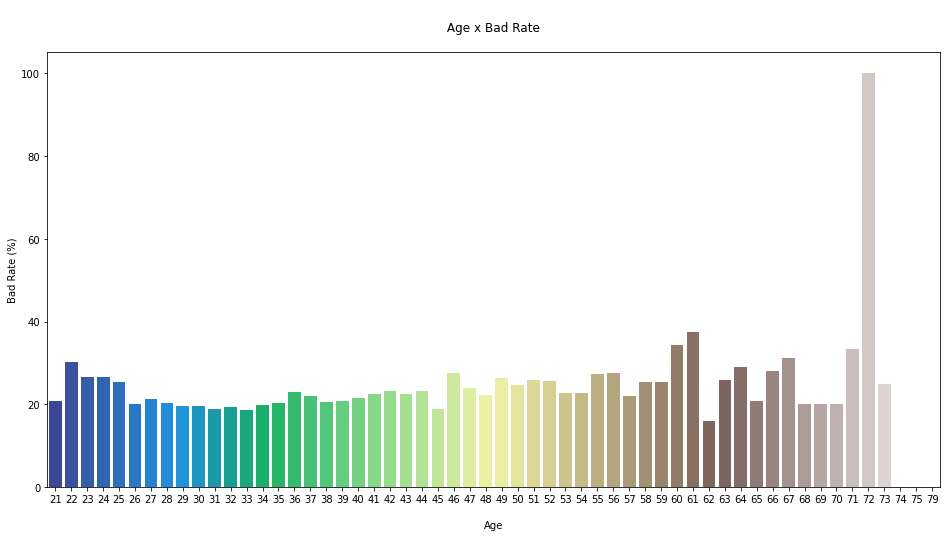

In [13]:
plt.figure(figsize = (16,8))
sns.barplot(x = df_age['AGE'], y = df_age['BAD_RATE'], orient = 'v', palette = 'terrain')
plt.xlabel('\nAge')
plt.ylabel('Bad Rate (%)')
plt.title('\n Age x Bad Rate \n')
plt.show()

Ther isn't a clear risk sorting looking at the Age x Bad Rate. But we can note:

The age range from 26 to 35 have comparative lower default rate \
the age rante from 71 to 73 have comparative higher defalut rate besides de lower volume of observations

In [14]:
# Payment Status
df[['PAY_1','PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Note: \
At the "Discussion" link we can see the explanation about the -2 and 0 statuses: \
-2 corresponds to there being no credit to pay \
0 corresponds to a payment being made on time but not the total amount to clear the balance. \
(Another way to think about this is that the minimum payment is met

In [15]:
# Amout Billed:
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Note: \
These columns present the amount billed to each customer from April 2005 through September 2005, in reverse order.\
Negative values should be treated or interpreted as some kind of cashback given to customer? \

In the "Data Processing" session, I'm going to replace negative billed values by zero

In [16]:
# Payback Amount
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Payback Amount seems to be Ok because there isn't negative values

### End

## 

## 3 - Data Processing

In [17]:
# Here I will process the data along the steps.
# For step a new dataset will be created

# df1 - Assuming that BILL_AMTX shoud always be >= 0
df1 = df.copy()
df1['BILL_AMT1'] = np.where(df1['BILL_AMT1'] < 0, 0, df1['BILL_AMT1'])
df1['BILL_AMT2'] = np.where(df1['BILL_AMT2'] < 0, 0, df1['BILL_AMT2'])
df1['BILL_AMT3'] = np.where(df1['BILL_AMT3'] < 0, 0, df1['BILL_AMT3'])
df1['BILL_AMT4'] = np.where(df1['BILL_AMT4'] < 0, 0, df1['BILL_AMT4'])
df1['BILL_AMT5'] = np.where(df1['BILL_AMT5'] < 0, 0, df1['BILL_AMT5'])
df1['BILL_AMT6'] = np.where(df1['BILL_AMT6'] < 0, 0, df1['BILL_AMT6'])
# end

# df2 - Assuming that BILL_AMT(x) >= PAY_AMT(x-1)
# BILL_AMT - Amount of bill statement
# PAY_AMT - Amount of previous payment, each of these amounts was paid to settle the preceding month's bill,
df2 = df1.copy()
df2['PAY_AMT1'] = np.where(df2['PAY_AMT1'] > df2['BILL_AMT2'], df2['BILL_AMT2'], df2['PAY_AMT1'])
df2['PAY_AMT2'] = np.where(df2['PAY_AMT2'] > df2['BILL_AMT3'], df2['BILL_AMT3'], df2['PAY_AMT2'])
df2['PAY_AMT3'] = np.where(df2['PAY_AMT3'] > df2['BILL_AMT4'], df2['BILL_AMT4'], df2['PAY_AMT3'])
df2['PAY_AMT4'] = np.where(df2['PAY_AMT4'] > df2['BILL_AMT5'], df2['BILL_AMT5'], df2['PAY_AMT4'])
df2['PAY_AMT5'] = np.where(df2['PAY_AMT5'] > df2['BILL_AMT6'], df2['BILL_AMT6'], df2['PAY_AMT5'])
#end

# df3 - Creating variables BILL_BALL(x) = BILL_AMT(x) - PAY_AMT(x-1)
df3 = df2.copy()
df3['BILL_BAL6'] = (df3['BILL_AMT6'] - df3['PAY_AMT5'])
df3['BILL_BAL5'] = (df3['BILL_AMT5'] - df3['PAY_AMT4'])
df3['BILL_BAL4'] = (df3['BILL_AMT4'] - df3['PAY_AMT3'])
df3['BILL_BAL3'] = (df3['BILL_AMT3'] - df3['PAY_AMT2'])
df3['BILL_BAL2'] = (df3['BILL_AMT2'] - df3['PAY_AMT1'])
#end

# df4 - Creating flag of overlimit credit card
df4 = df3.copy()
df4['OV_LIM'] = np.where(df4['LIMIT_BAL'] < df4['BILL_AMT1'], 1,
                np.where(df4['LIMIT_BAL'] < df4['BILL_AMT2'], 1,
                np.where(df4['LIMIT_BAL'] < df4['BILL_AMT3'], 1,
                np.where(df4['LIMIT_BAL'] < df4['BILL_AMT4'], 1,
                np.where(df4['LIMIT_BAL'] < df4['BILL_AMT5'], 1,
                np.where(df4['LIMIT_BAL'] < df4['BILL_AMT6'], 1, 0))))))
#end

### End

### 

### 4 - Modelling

#### 4.1 - Logistic Regression

In [18]:
#Treating outliers

def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
df4=df4.apply(outlier_capping)

In [19]:
# Creating dummies to the categorical variables

df6 = df4.copy()
df6 = df6.drop(['ID'], axis = 1)
df6 = pd.get_dummies(df6, columns=["SEX"])
df6 = pd.get_dummies(df6, columns=["EDUCATION"])
df6 = pd.get_dummies(df6, columns=["MARRIAGE"])

print(df6.columns)

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'BILL_BAL6', 'BILL_BAL5',
       'BILL_BAL4', 'BILL_BAL3', 'BILL_BAL2', 'OV_LIM', 'SEX_1', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'MARRIAGE_1.0', 'MARRIAGE_2.0', 'MARRIAGE_3.0'],
      dtype='object')


In [20]:
# Correlation to the target variable
corr_matrix = df6.corr().abs()
print(corr_matrix["default"].sort_values(ascending=False))

default         1.000000
PAY_1           0.328366
PAY_2           0.264478
PAY_3           0.233753
PAY_4           0.213136
PAY_5           0.199674
PAY_6           0.182026
LIMIT_BAL       0.154572
PAY_AMT2        0.106112
PAY_AMT1        0.104336
PAY_AMT3        0.090514
PAY_AMT4        0.080094
PAY_AMT5        0.079533
OV_LIM          0.074605
PAY_AMT6        0.072511
EDUCATION_1     0.051328
SEX_1           0.039961
SEX_2           0.039961
EDUCATION_5     0.037899
EDUCATION_2     0.036467
EDUCATION_3     0.032403
MARRIAGE_2.0    0.030619
MARRIAGE_1.0    0.029775
EDUCATION_4     0.025397
BILL_AMT1       0.022790
BILL_AMT2       0.017039
BILL_AMT3       0.015699
AGE             0.013647
BILL_AMT4       0.011782
BILL_AMT5       0.008828
BILL_BAL6       0.008229
BILL_BAL5       0.006565
BILL_AMT6       0.006511
BILL_BAL4       0.004212
MARRIAGE_3.0    0.004043
BILL_BAL3       0.003737
BILL_BAL2       0.000067
Name: default, dtype: float64


In [21]:
# Selecting the 25 variables most correlated with the target

corr_matrix_twentyfive = df6[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL',
     'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'OV_LIM', 'PAY_AMT6', 'SEX_1', 'SEX_2',
     'EDUCATION_1', 'SEX_1', 'SEX_2', 'EDUCATION_5', 'EDUCATION_2', 'EDUCATION_3', 'MARRIAGE_2.0',
     'MARRIAGE_1.0', 'EDUCATION_4', 'BILL_AMT1']].corr().abs()

# Taking the correlation matrix between them in order avoid multicolinearity bias:
upper_tri_selected = corr_matrix_twentyfive.where(np.triu(np.ones(corr_matrix_twentyfive.shape),k=1).astype(np.bool))

# Finding variables with > 0.5 correlation between them
drop_vars = [column for column in upper_tri_selected.columns if any(upper_tri_selected[column] >=  0.5)]

corr_matrix_dropped = corr_matrix_twentyfive.drop(drop_vars, axis = 1)

# Dropping variables that still remain with > 0.5 correlation
corr_matrix_dropped = corr_matrix_dropped.drop(['PAY_AMT3', 'PAY_AMT3', 'EDUCATION_3'], axis = 1).corr().abs()

upper_tri_dropped = corr_matrix_dropped.where(np.triu(np.ones(corr_matrix_dropped.shape),k=1).astype(np.bool))
print(upper_tri_dropped)


              PAY_1  LIMIT_BAL  PAY_AMT2  PAY_AMT4  PAY_AMT5    OV_LIM  \
PAY_1           NaN   0.357173  0.076528  0.099477  0.119957  0.310588   
LIMIT_BAL       NaN        NaN  0.372387  0.355540  0.359063  0.211256   
PAY_AMT2        NaN        NaN       NaN  0.476274  0.482899  0.183743   
PAY_AMT4        NaN        NaN       NaN       NaN  0.506527  0.180174   
PAY_AMT5        NaN        NaN       NaN       NaN       NaN  0.189365   
OV_LIM          NaN        NaN       NaN       NaN       NaN       NaN   
PAY_AMT6        NaN        NaN       NaN       NaN       NaN       NaN   
EDUCATION_1     NaN        NaN       NaN       NaN       NaN       NaN   
EDUCATION_5     NaN        NaN       NaN       NaN       NaN       NaN   
MARRIAGE_2.0    NaN        NaN       NaN       NaN       NaN       NaN   
EDUCATION_4     NaN        NaN       NaN       NaN       NaN       NaN   
BILL_AMT1       NaN        NaN       NaN       NaN       NaN       NaN   

              PAY_AMT6  EDUCATION_1  

In [22]:
# Standard Scaling numeric vars
nr_vars = df6[['LIMIT_BAL', 'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_AMT1']]

ss = StandardScaler()
scaled_nr_vars = ss.fit_transform(nr_vars)
scaled_vars = pd.DataFrame(scaled_nr_vars, columns = nr_vars.columns)
# End

# Joining data
cat_vars = df6[['PAY_1',  'OV_LIM', 'EDUCATION_1', 'EDUCATION_5', 'MARRIAGE_2.0', 'EDUCATION_4']]

target_var = df6[['default']]
data_logreg = pd.concat([cat_vars, scaled_vars, target_var], axis=1)
# End

data_logreg.head()

,PAY_1,OV_LIM,EDUCATION_1,EDUCATION_5,MARRIAGE_2.0,EDUCATION_4,LIMIT_BAL,PAY_AMT2,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT1,default
0,2.0,0,0,0,0,0,-1.150697,-0.436986,-0.468538,-0.470321,-0.412518,-0.671131,1
1,-1.0,0,0,0,1,0,-0.366890,-0.404973,-0.354247,-0.470321,-0.231346,-0.688894,1
2,0.0,0,0,0,1,0,-0.602032,-0.353506,-0.354247,-0.355123,0.040411,-0.305692,0
3,0.0,0,0,0,0,0,-0.915555,-0.300083,-0.342818,-0.347174,-0.321932,-0.049555,0
4,-1.0,0,0,0,0,0,-0.915555,3.180750,0.560075,-0.390950,-0.351010,-0.603255,0


In [23]:
# Splitting the data into training and test

logreg = LogisticRegression()

X = data_logreg.drop(['default'], axis = 1)
Y = data_logreg[['default']]

train_y, test_y, train_X, test_X = train_test_split(Y,X, test_size=0.3, random_state=0)


# Fitting the model
logit_model=sm.Logit(train_y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.527337
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.008     
Dependent Variable: default          AIC:              22172.1488
Date:               2022-06-29 04:47 BIC:              22267.5761
No. Observations:   21000            Log-Likelihood:   -11074.   
Df Model:           11               LL-Null:          -11160.   
Df Residuals:       20988            LLR p-value:      3.1730e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
PAY_1             0.6498   0.0172  37.6922 0.0000  0.6160  0.6836
OV_LIM           -0.5311   0.0506 -10.5027 0.0000 -0.6302 -0.4320


In [24]:
# Dropping p-value > 0.05 variables
logreg = LogisticRegression()

X = data_logreg.drop(['default', 'LIMIT_BAL', 'PAY_AMT5', 'PAY_AMT6'], axis = 1)
Y = data_logreg[['default']]


# Splitting data into training and test
train_y, test_y, train_X, test_X = train_test_split(Y,X, test_size=0.3, random_state=0)


# Fitting the model
logit_model=sm.Logit(train_y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.528210
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.006     
Dependent Variable: default          AIC:              22202.8048
Date:               2022-06-29 04:47 BIC:              22274.3753
No. Observations:   21000            Log-Likelihood:   -11092.   
Df Model:           8                LL-Null:          -11160.   
Df Residuals:       20991            LLR p-value:      1.5237e-25
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
PAY_1             0.6720   0.0168  39.9730 0.0000  0.6391  0.7050
OV_LIM           -0.4597   0.0490  -9.3726 0.0000 -0.5558 -0.3636


In [25]:
# Logistic Regression
accuracy={}
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

# Model Accuracy
conf_m = confusion_matrix(train_pred,train_y)

#print('intercept:', model.intercept_)
#print('coef:', model.coef_, end='\n\n')

print(metrics.classification_report(train_y, train_pred))
print('\nAccuracy Score for LR Model (training): ', round(accuracy_score(train_pred, train_y),4))

print(metrics.classification_report(test_y, test_pred))
print('\nAccuracy Score for LR Model (testing): ', round(accuracy_score(test_pred, test_y),4))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     16304
           1       0.70      0.27      0.39      4696

    accuracy                           0.81     21000
   macro avg       0.76      0.62      0.64     21000
weighted avg       0.79      0.81      0.78     21000


Accuracy Score for LR Model (training):  0.8105
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      7060
           1       0.71      0.26      0.38      1940

    accuracy                           0.82      9000
   macro avg       0.77      0.62      0.64      9000
weighted avg       0.80      0.82      0.78      9000


Accuracy Score for LR Model (testing):  0.8177


#### End

#### 4.2 - Decision Tree 

In [26]:
# Standard Scaling numeric vars
nr_vars = df4[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
               'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
               'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_BAL6', 'BILL_BAL5',
               'BILL_BAL4', 'BILL_BAL3', 'BILL_BAL2']]

ss = StandardScaler()
scaled_nr_vars = ss.fit_transform(nr_vars)
scaled_vars = pd.DataFrame(scaled_nr_vars, columns = nr_vars.columns)
# End

# Joining data
cat_vars = df4[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                'PAY_6', 'OV_LIM', 'SEX', 'EDUCATION', 'MARRIAGE']]

target_var = df4[['default']]
data_dectree = pd.concat([cat_vars, scaled_vars, target_var], axis=1)
# End

data_dectree.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,OV_LIM,SEX,EDUCATION,MARRIAGE,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_BAL6,BILL_BAL5,BILL_BAL4,BILL_BAL3,BILL_BAL2,default
0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,0,2,2,1.0,-1.150697,-1.259302,-0.671131,-0.677856,-0.706888,-0.708006,-0.699587,-0.689556,-0.538217,-0.436986,-0.485774,-0.468538,-0.470321,-0.412518,-0.639325,-0.650006,-0.656907,-0.666078,-0.623879,1
1,-1.0,2.0,0.0,0.0,0.0,2.0,0,2,2,2.0,-0.366890,-1.039282,-0.688894,-0.698470,-0.675916,-0.653515,-0.638526,-0.630699,-0.538217,-0.404973,-0.376041,-0.354247,-0.470321,-0.231346,-0.577207,-0.604357,-0.617109,-0.638450,-0.645479,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2,2.0,-0.602032,-0.159203,-0.305692,-0.514309,-0.506886,-0.469340,-0.435405,-0.408915,-0.372914,-0.353506,-0.376041,-0.354247,-0.355123,0.040411,-0.362185,-0.390651,-0.423395,-0.468004,-0.476323,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2,1.0,-0.915555,0.170827,-0.049555,-0.002245,0.048397,-0.236469,-0.187784,-0.156269,-0.320427,-0.300083,-0.354094,-0.342818,-0.347174,-0.321932,-0.096855,-0.131983,-0.181966,0.110383,0.052665,0
4,-1.0,0.0,-1.0,0.0,0.0,0.0,0,1,2,1.0,-0.915555,2.371025,-0.603255,-0.639413,-0.160712,-0.359274,-0.361212,-0.344265,-0.320427,3.180750,0.611558,0.560075,-0.390950,-0.351010,-0.288028,-0.461347,-0.465277,-0.666078,-0.614970,0


In [27]:
# Splitting data into train and test

X = data_dectree.drop(['default'], axis = 1)
Y = data_dectree[['default']]

train_y, test_y, train_X, test_X = train_test_split(Y,X, test_size=0.3, random_state=0)

In [28]:
# Model Fitting
clf_tree = DecisionTreeClassifier(max_depth = 4, max_features=5, min_samples_leaf=10, criterion='gini' )
clf_tree.fit(train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=5, min_samples_leaf=10)

In [29]:
# Model Accuracy
train_pred1 = clf_tree.predict(train_X)
test_pred1 = clf_tree.predict(test_X)

print(metrics.classification_report(train_y, train_pred1))
print('\nAccuracy Score for DTree (training): ', round(accuracy_score(train_pred1, train_y),4))

print(metrics.classification_report(test_y, test_pred1))
print('\nAccuracy Score for DTree (testing): ', round(accuracy_score(test_pred1, test_y),4))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     16304
           1       0.68      0.17      0.27      4696

    accuracy                           0.80     21000
   macro avg       0.74      0.57      0.58     21000
weighted avg       0.78      0.80      0.75     21000


Accuracy Score for DTree (training):  0.7968
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7060
           1       0.62      0.15      0.24      1940

    accuracy                           0.80      9000
   macro avg       0.71      0.56      0.56      9000
weighted avg       0.77      0.80      0.74      9000


Accuracy Score for DTree (testing):  0.797


<AxesSubplot:>

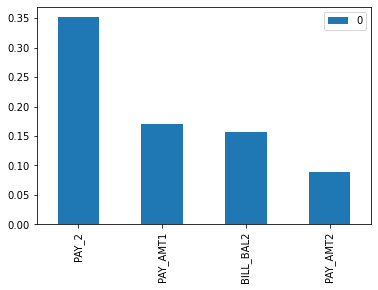

In [30]:
# Feature Importance
feature_names = X.columns
feature_names

feature_imp = pd.DataFrame(clf_tree.feature_importances_, index = feature_names).sort_values(by=0, ascending=False)
features = list(feature_imp[feature_imp[0]>0].index)
feature_imp.head(4).plot(kind='bar')

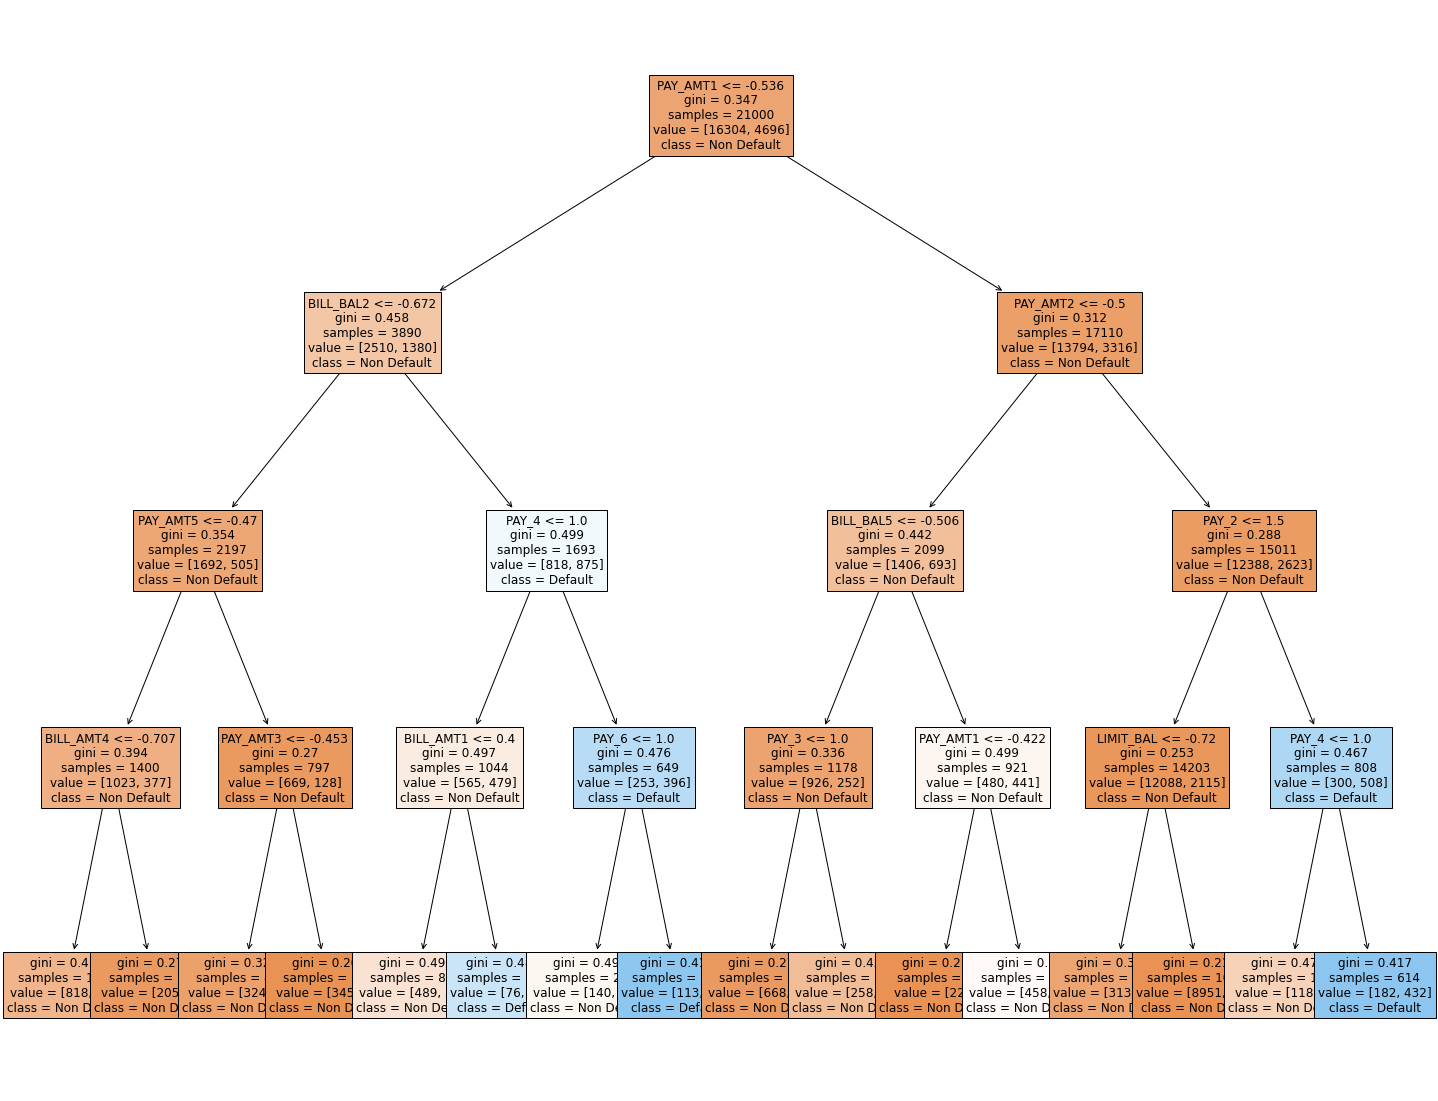

In [31]:
# Plotting decision tree model
from sklearn import tree

fig = plt.figure(figsize=(25,20)) 
_ = tree.plot_tree(clf_tree,
                   feature_names = feature_names,
                   class_names = {0:'Non Default', 1:'Default'},
                   filled = True,
                   fontsize = 12)

#### End

#### 4.3 - Random Forest

In [32]:
# Splitting data into train and test - Using the same datase used on Decision Tree Model
X = data_dectree.drop(['default'], axis = 1)
Y = data_dectree[['default']]

train_y, test_y, train_X, test_X = train_test_split(Y,X, test_size=0.3, random_state=0)

In [33]:
# Model Fitting
radm_clf = RandomForestClassifier(n_estimators=10 , max_depth = 6, max_features=5, n_jobs=-1, random_state=0)
radm_clf.fit( train_X, train_y)

RandomForestClassifier(max_depth=6, max_features=5, n_estimators=10, n_jobs=-1,
                       random_state=0)

In [34]:
# Model Accuracy
train_pred2=radm_clf.predict(train_X)
test_pred2=radm_clf.predict(test_X)

print(metrics.classification_report(train_y, train_pred2))
print('\nAccuracy Score for RForest (training): ', round(accuracy_score(train_pred2, train_y),4))

print(metrics.classification_report(test_y, test_pred2))
print('\nAccuracy Score for RForest (testing): ', round(accuracy_score(test_pred2, test_y),4))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     16304
           1       0.72      0.36      0.48      4696

    accuracy                           0.83     21000
   macro avg       0.78      0.66      0.69     21000
weighted avg       0.81      0.83      0.80     21000


Accuracy Score for RForest (training):  0.8253
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7060
           1       0.69      0.34      0.45      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.81      0.82      0.80      9000


Accuracy Score for RForest (testing):  0.8238


#### End

#### 4.4 - KNN Model

In [35]:
# Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)

In [36]:
# Model Fitting
std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [37]:
# Evaluating suggested hyperparameters
param_grid = {'n_neighbors':[3,5,7],
              'weights': ['uniform', 'distance']}

In [38]:
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, train_y)

In [39]:
# Best score result
model.best_score_

0.7731951217582038

In [40]:
# Best parameters result
model.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [41]:
# Model Accuracy
train_pred3 = model.predict(std_data_train)
test_pred3 = model.predict(std_data_test)

print(metrics.classification_report(train_y, train_pred3))
print('\nAccuracy Score for model2(training): ', round(accuracy_score(train_pred3, train_y),4))

print(metrics.classification_report(test_y, test_pred3))
print('\nAccuracy Score for model2(testing): ', round(accuracy_score(test_pred3, test_y),4))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     16304
           1       0.71      0.42      0.53      4696

    accuracy                           0.83     21000
   macro avg       0.78      0.69      0.71     21000
weighted avg       0.82      0.83      0.82     21000


Accuracy Score for model2(training):  0.8322
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7060
           1       0.56      0.32      0.41      1940

    accuracy                           0.80      9000
   macro avg       0.70      0.63      0.64      9000
weighted avg       0.77      0.80      0.78      9000


Accuracy Score for model2(testing):  0.7988


#### End

### 5 - Performance Evaluation

In [42]:
# Acurracy rates

# Test
lr=round(accuracy_score(test_pred,  test_y)*100, 1)
dt=round(accuracy_score(test_pred1, test_y)*100, 1)
rf=round(accuracy_score(test_pred2, test_y)*100, 1)
kn=round(accuracy_score(test_pred3, test_y)*100, 1)

# Train
lr1=round(accuracy_score(train_pred,  train_y)*100, 1)
dt1=round(accuracy_score(train_pred1, train_y)*100, 1)
rf1=round(accuracy_score(train_pred2, train_y)*100, 1)
kn1=round(accuracy_score(train_pred3, train_y)*100, 1)

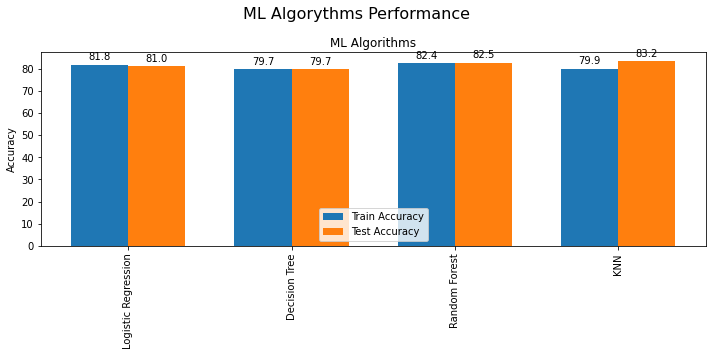

In [43]:
# ML Algorythms Performance

labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']
train = [lr, dt, rf, kn]
test = [lr1, dt1, rf1, kn1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, train, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test, width, label='Test Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('ML Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
plt.legend(loc='lower center')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.suptitle('ML Algorythms Performance', fontsize=16)
fig.tight_layout()

plt.show()

##### Conclusions

Random Forest presented higher performance in terms of accuracy, not only in the trainning dataset but also in the test dataset; \
Logistic Regression model presented a very similar performance both in training and Test datasets, it can be result of a good fitting process \
In general the models performance were very similar, just KNN showed a higher difference of accuracy in the test dataset compared with the trainning dataset.

### End